# 2. Data Preprocessing

## 2.1 Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

## 2.2 Import Dataset

In [2]:
data = pd.read_csv("fraud_oracle.csv")

In [3]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=5)
for train_index1, test_index1 in split1.split(data, data["FraudFound_P"]):
    fraud_train = data.loc[train_index1]
    fraud_val_test = data.loc[test_index1]

fraud_val_test.reset_index(drop=True, inplace=True)
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=5)
for train_index2, test_index2 in split2.split(fraud_val_test, fraud_val_test["FraudFound_P"]):
    fraud_val = fraud_val_test.loc[train_index2]
    fraud_test = fraud_val_test.loc[test_index2]

In [5]:
#final split dataframes
fraud_train.reset_index(drop=True, inplace=True) 
fraud_val.reset_index(drop=True, inplace=True) 
fraud_test.reset_index(drop=True, inplace=True)

In [6]:
data_train = fraud_train.copy()
data_val=fraud_val.copy()
data_test=fraud_test.copy()

## 2.3 Data Preprocessing

### 2.3.1 Drop Irrelevant Columns

In [7]:
data_train= data_train.drop(columns=['PolicyNumber','RepNumber','Year'])
data_test= data_test.drop(columns=['PolicyNumber','RepNumber','Year'])
data_val= data_val.drop(columns=['PolicyNumber','RepNumber','Year'])

In [8]:
data_train.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Feb,3,Wednesday,Honda,Urban,Monday,Feb,3,Male,Married,...,none,more than 7,36 to 40,No,No,External,none,no change,3 to 4,Collision
1,May,2,Monday,Toyota,Urban,Tuesday,May,2,Male,Married,...,1,more than 7,51 to 65,No,No,External,1 to 2,no change,1 vehicle,Collision
2,Dec,1,Tuesday,Toyota,Urban,Friday,Dec,2,Male,Married,...,2 to 4,5 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,Liability
3,Apr,1,Saturday,Mazda,Urban,Wednesday,Apr,1,Male,Single,...,none,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
4,Mar,4,Wednesday,Dodge,Urban,Friday,Mar,4,Male,Married,...,1,more than 7,41 to 50,No,No,External,1 to 2,no change,1 vehicle,Collision


### 2.3.2 Fill in Missing Values

In [9]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

There is no missing value in our dataset

But as we see from the data exploration part:
DayOfWeekClaimed - contains a 0 instead of a day of the week
MonthClaimed - contains a 0 instead of the month
Age - contains a 0 instead of the necessary age
So we will deal with these issues now.

In [10]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed
print('DayOfWeekClaimed has ', len(data.loc[(data['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(data.loc[(data['MonthClaimed']=='0')]),' row(s) with a 0') 
print(' ')

DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0
 


In [11]:
#Since both DayOfWeekClaimed and MonthClaimed are 0 for the same entry, I will drop
data_train = data_train.loc[data['DayOfWeekClaimed']!='0']
data_test = data_test.loc[data['DayOfWeekClaimed']!='0']
data_val = data_val.loc[data['DayOfWeekClaimed']!='0']

In [12]:
#how many rows where the feature Age is assigned a zero, 
print(len(data[data['Age']==0]))

320


In [13]:
data.loc[data['Age']==0, 'AgeOfPolicyHolder']
#every row with Age=0, has a Policy Holder that is aged between 16 and 17 years.

7        16 to 17
13       16 to 17
28       16 to 17
31       16 to 17
58       16 to 17
           ...   
15243    16 to 17
15262    16 to 17
15274    16 to 17
15379    16 to 17
15392    16 to 17
Name: AgeOfPolicyHolder, Length: 320, dtype: object

In [14]:
#does the comparision of value for age to the value of the AgeOfPolicyHolder
groupings = []
for holder in data['AgeOfPolicyHolder']:
    if 'to' in holder :
        temp = holder.split()
        nr=[int(temp[0]),int(temp[2])]
        groupings.append(nr)
    else :
        temp = holder.split()
        nr = [int(temp[1]),129]
        groupings.append(nr)
                        
age_idx = []
rw_idx = []

In [15]:
#Assigns an age of 16.5 to all rows with missing Age values
data_age0_idx = (data_train['Age']==0)
data_train.loc[list(data_age0_idx),'Age']=16.5
data_age0_idx = (data_test['Age']==0)
data_test.loc[list(data_age0_idx),'Age']=16.5
data_age0_idx = (data_val['Age']==0)
data_val.loc[list(data_age0_idx),'Age']=16.5

In [16]:
data_train=data_train.drop(columns=['AgeOfPolicyHolder'])
data_test=data_test.drop(columns=['AgeOfPolicyHolder'])
data_val=data_val.drop(columns=['AgeOfPolicyHolder'])

## 2.4 Variable Correlation

In [17]:
corr = data.corr()['FraudFound_P'].sort_values()

print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
Age                  -0.029741
Year                 -0.024760
PolicyNumber         -0.020345
WeekOfMonth          -0.011861
RepNumber            -0.007551
WeekOfMonthClaimed   -0.005761
DriverRating          0.007266
Deductible            0.017348
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Age                  -0.029741
Year                 -0.024760
PolicyNumber         -0.020345
WeekOfMonth          -0.011861
RepNumber            -0.007551
WeekOfMonthClaimed   -0.005761
DriverRating          0.007266
Deductible            0.017348
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64


<AxesSubplot:>

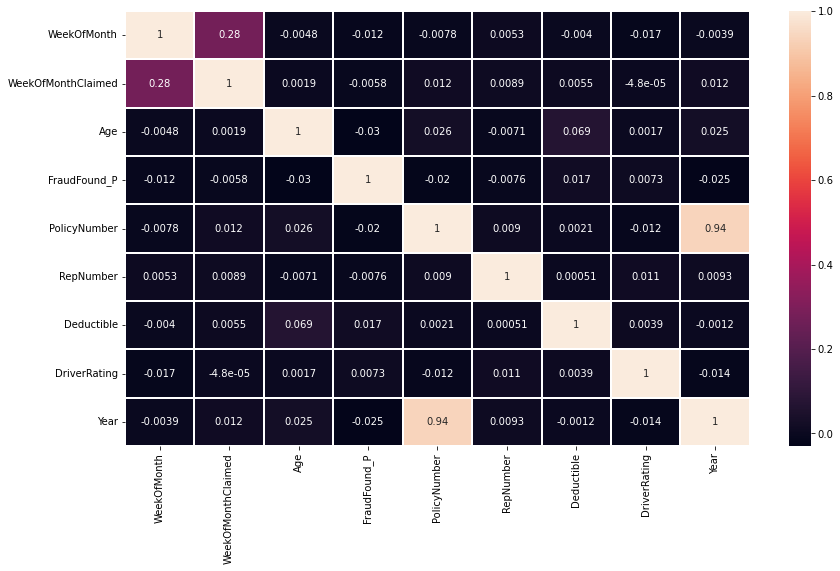

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot = True,  linewidths=.05) 

<font size="3.5">**Insights**</font><br>We consider variables are highly correlated when > 0.80 :<br>
--> there is no high correlation between variables

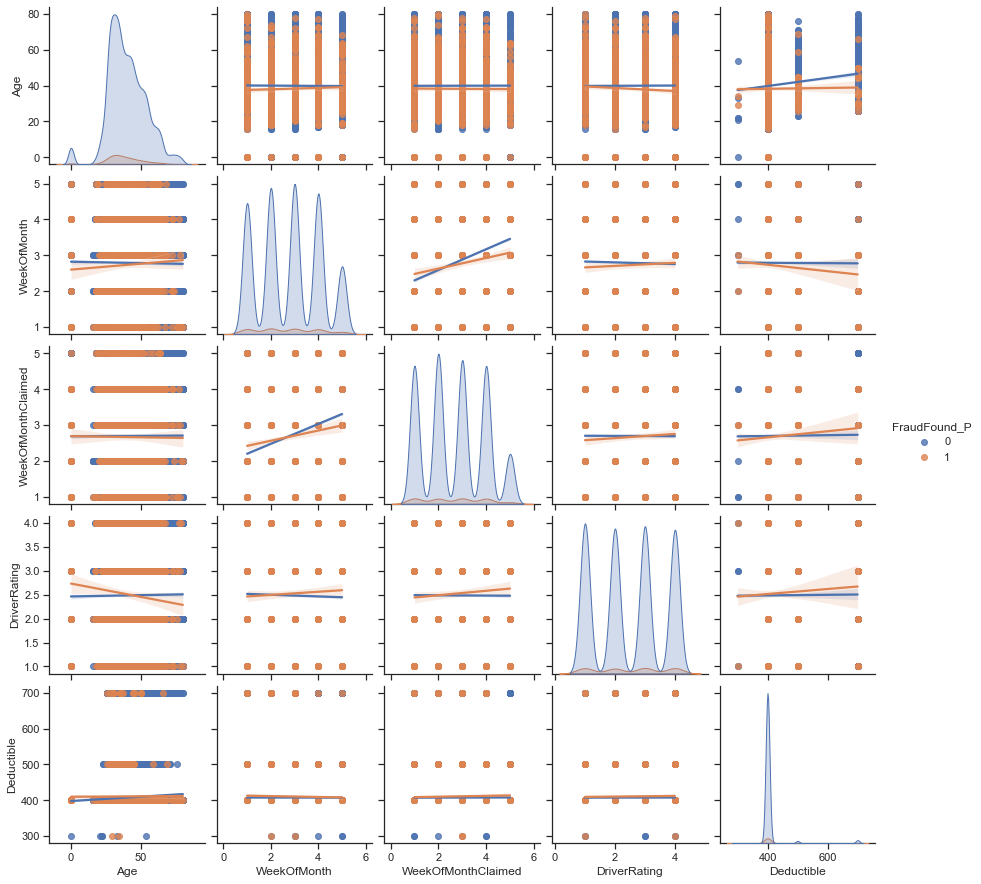

In [19]:
sns.set(style="ticks")
vars= ["Age", "WeekOfMonth", "WeekOfMonthClaimed","DriverRating","Deductible"]
p = pairplot(data, vars=vars, hue="FraudFound_P", kind="reg")

### 2.5.1 Specific data types of Columns

Text(0, 0.5, 'Data type')

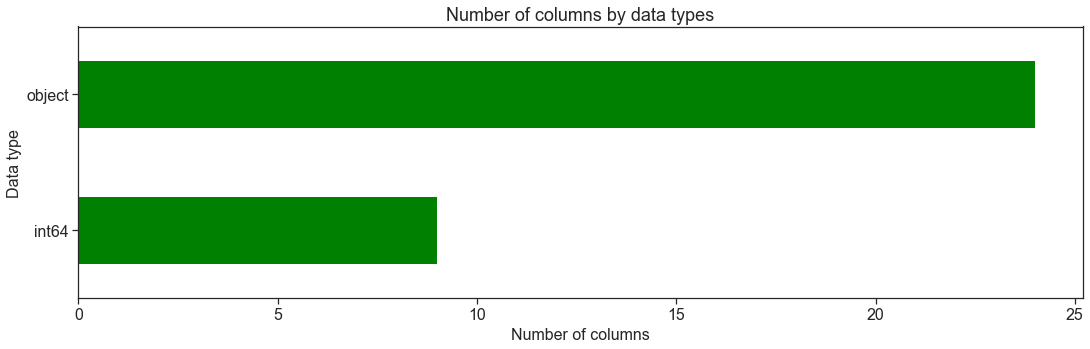

In [20]:
data.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

### 2.5.2 Number of Categories for each object data

In [21]:
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

### 2.5.3 Visualize Distribution of Categorical Variables

<AxesSubplot:xlabel='PoliceReportFiled', ylabel='FraudFound_P'>

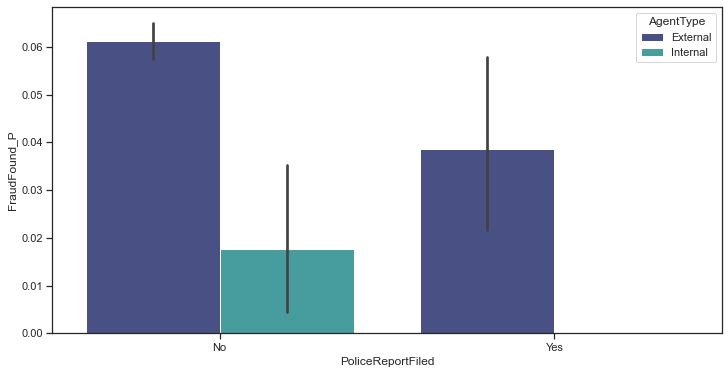

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x="PoliceReportFiled", y= "FraudFound_P", hue="AgentType", data=data,palette='mako')

<font size="3.5">**Insights**</font><br>There is no filed policy report for those who buy auto insurance through internal agent.

Text(0.5, 1.0, 'Number of claim applications are fraudulent')

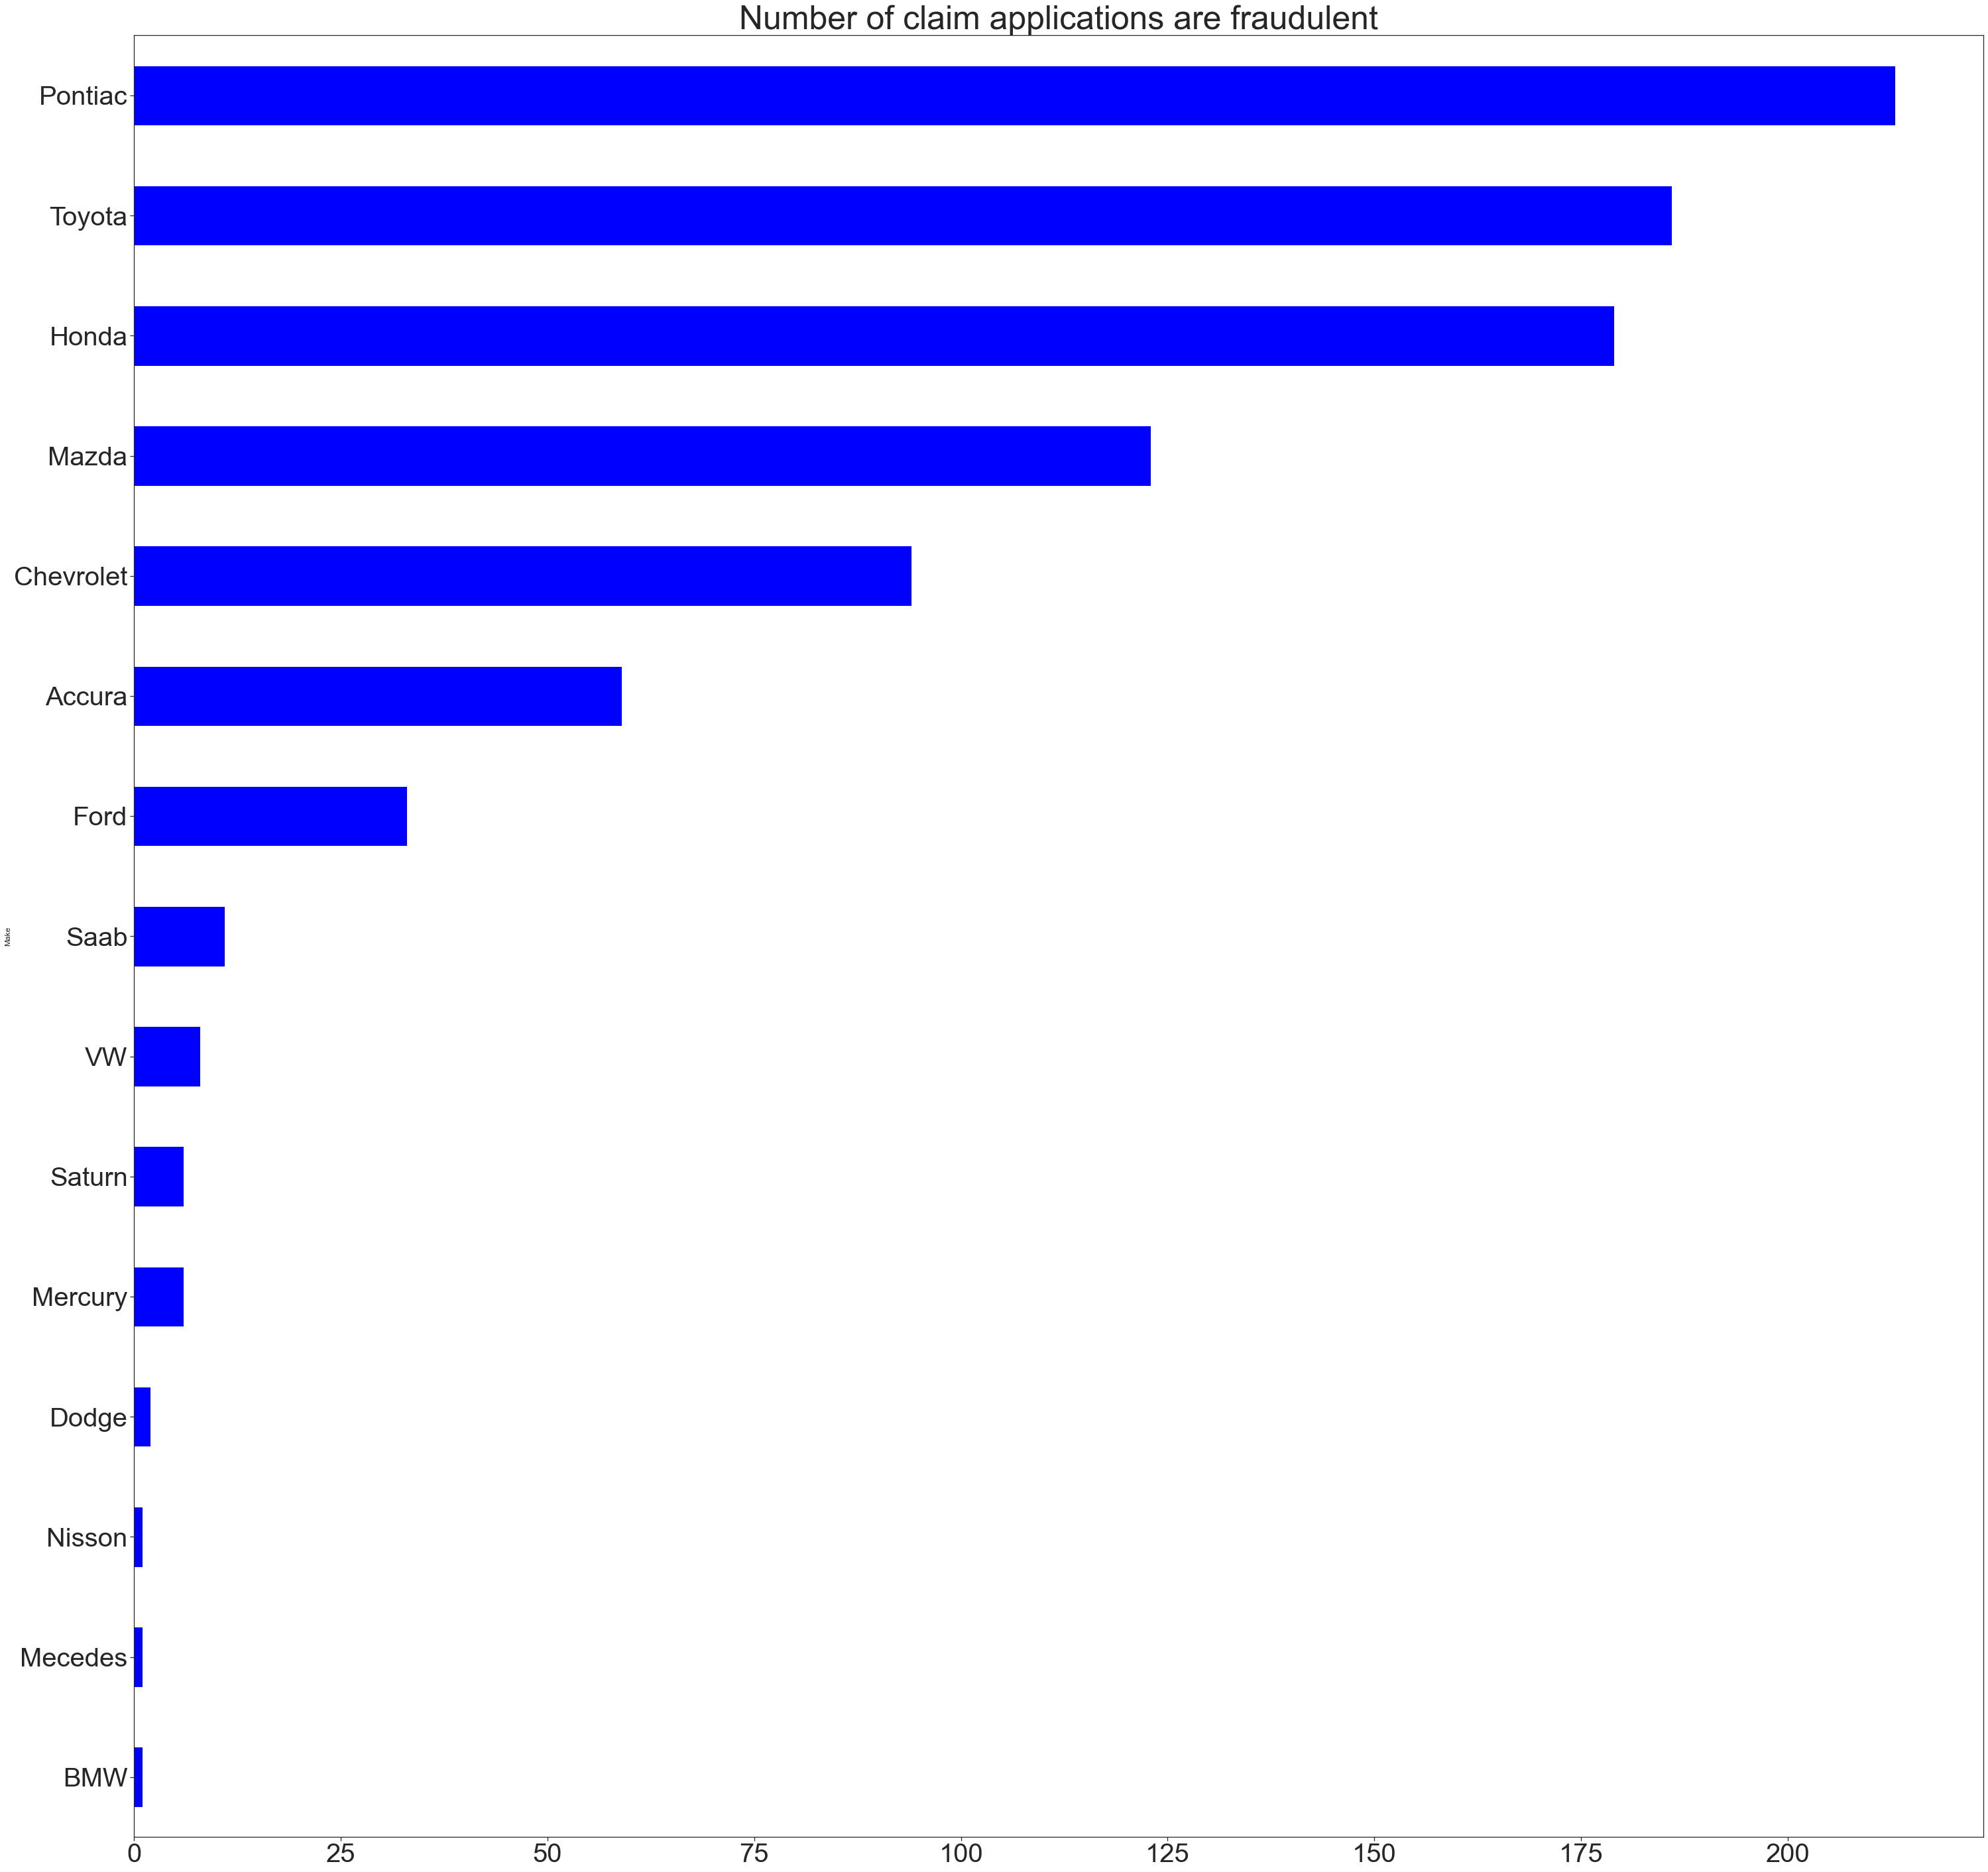

In [23]:
fig = plt.figure(figsize=(50,50))
data[data['FraudFound_P'] == 1].groupby(
    'Make')['FraudFound_P'].count().sort_values().plot(kind='barh',fontsize=40, color="blue")

plt.title('Number of claim applications are fraudulent', fontsize=50)

## 2.6 Encoding Categorical and Standardizing Numeric Variables

ordinal encoding first

In [24]:
#pip install category_encoders

In [25]:
from category_encoders.ordinal import OrdinalEncoder
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'Days_Policy_Accident','mapping':{'none':0,'1 to 7':1,'8 to 15':2, '15 to 30':3, 'more than 30':4}},
     {'col':'Days_Policy_Claim','mapping':{'more than 30':30,'15 to 30':22.5,'8 to 15':11.5,'none':0}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1, '2 vehicles':2, '3 to 4':3, '5 to 8':4, 'more than 8':5}},
    {'col':'AddressChange_Claim','mapping':{'no change':0, 'under 6 months':1, '1 year':2, '2 to 3 years':3, '4 to 8 years':4}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [26]:
data_ordinal = data_train[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident','Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X1 = ord_encoder.fit_transform(data_ordinal)

data_ordinal = data_test[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X2 = ord_encoder.fit_transform(data_ordinal)


data_ordinal = data_val[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X3 = ord_encoder.fit_transform(data_ordinal)

In [27]:
X1#done with the ordinal encoding

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,AddressChange_Claim,AgeOfVehicle
0,2,3,1.0,2.0,0,0,24500,4,30,3,0,8
1,5,1,2.0,5.0,1,1,24500,4,30,1,0,8
2,12,2,5.0,12.0,2,3,24500,4,30,1,0,5
3,4,6,3.0,4.0,0,6,24500,4,30,1,0,6
4,3,3,5.0,3.0,1,1,34500,0,11,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10789,12,4,5.0,12.0,1,6,24500,4,30,1,0,7
10790,4,4,1.0,4.0,2,3,69001,4,30,3,4,7
10791,8,6,3.0,8.0,0,1,24500,4,30,1,0,7
10792,4,6,4.0,4.0,2,6,24500,4,30,1,0,5


In [28]:
data_train_ord=data_train.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])
data_test_ord=data_test.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])
data_val_ord=data_val.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident','Days_Policy_Claim', 'NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])

In [29]:
data_train_ord#remove the ordinal encoding variables in the data_train

,WeekOfMonth,Make,AccidentArea,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,3,Honda,Urban,3,Male,Married,39.0,Policy Holder,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
1,2,Toyota,Urban,2,Male,Married,62.0,Third Party,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
2,1,Toyota,Urban,2,Male,Married,24.0,Policy Holder,Sedan - Liability,Sport,0,400,3,No,No,External,Liability
3,1,Mazda,Urban,1,Male,Single,28.0,Policy Holder,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
4,4,Dodge,Urban,4,Male,Married,53.0,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,4,Honda,Urban,4,Male,Married,56.0,Third Party,Sedan - All Perils,Sedan,0,400,4,No,No,External,All Perils
10790,1,Chevrolet,Urban,2,Male,Single,46.0,Policy Holder,Utility - All Perils,Utility,0,400,3,No,No,External,All Perils
10791,1,Chevrolet,Rural,2,Male,Married,52.0,Policy Holder,Sedan - Liability,Sport,0,400,2,No,No,External,Liability
10792,3,Honda,Urban,3,Female,Single,30.0,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision


In [30]:
data_train = pd.concat([X1,data_train_ord], axis=1, join='inner')
data_test= pd.concat([X2,data_test_ord], axis=1, join='inner')
data_val= pd.concat([X3,data_test_ord], axis=1, join='inner')
#combine them

In [31]:
data_train

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,2,3,1.0,2.0,0,0,24500,4,30,3,...,Policy Holder,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
1,5,1,2.0,5.0,1,1,24500,4,30,1,...,Third Party,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
2,12,2,5.0,12.0,2,3,24500,4,30,1,...,Policy Holder,Sedan - Liability,Sport,0,400,3,No,No,External,Liability
3,4,6,3.0,4.0,0,6,24500,4,30,1,...,Policy Holder,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
4,3,3,5.0,3.0,1,1,34500,0,11,1,...,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,12,4,5.0,12.0,1,6,24500,4,30,1,...,Third Party,Sedan - All Perils,Sedan,0,400,4,No,No,External,All Perils
10790,4,4,1.0,4.0,2,3,69001,4,30,3,...,Policy Holder,Utility - All Perils,Utility,0,400,3,No,No,External,All Perils
10791,8,6,3.0,8.0,0,1,24500,4,30,1,...,Policy Holder,Sedan - Liability,Sport,0,400,2,No,No,External,Liability
10792,4,6,4.0,4.0,2,6,24500,4,30,1,...,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision


encode other variables using label encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

def encoding (data):

  #Label Encode
  data_cat_label = data[['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType']]
  label_encoder = preprocessing.LabelEncoder()
  for i in  data_cat_label:
    data[i] = label_encoder.fit_transform(data[i])
  
  #One hot Encode
  #onehotencoder = OneHotEncoder(handle_unknown='ignore')
  #data_hot_label = ['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']
  
  
#numeric
  min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
  data_num = ['WeekOfMonth','WeekOfMonthClaimed','Age','Deductible','DriverRating',
              'Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars']
  data[data_num] = min_max_scaler.fit_transform(data[data_num])

  return data  

In [33]:
data_train_t= encoding(data_train)
data_val_t = encoding(data_val)
data_test_t = encoding(data_test)

In [34]:
data_train_t

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,-0.818182,-0.333333,-0.50,-0.538462,-1.0,-1.000000,-0.816293,1.0,1.000000,0.0,...,0,Sedan - Collision,Sedan,0,-0.5,-0.333333,0,0,0,Collision
1,-0.272727,-1.000000,-0.25,-0.076923,-0.6,-0.666667,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,-0.333333,0,0,0,Collision
2,1.000000,-0.666667,0.50,1.000000,-0.2,0.000000,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Liability,Sport,0,-0.5,0.333333,0,0,0,Liability
3,-0.454545,0.666667,0.00,-0.230769,-1.0,1.000000,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision
4,-0.636364,-0.333333,0.50,-0.384615,-0.6,-0.666667,-0.408147,-1.0,-0.266667,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,1.000000,0.000000,0.50,1.000000,-0.6,1.000000,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - All Perils,Sedan,0,-0.5,1.000000,0,0,0,All Perils
10790,-0.454545,0.000000,-0.50,-0.230769,-0.2,0.000000,1.000000,1.0,1.000000,0.0,...,0,Utility - All Perils,Utility,0,-0.5,0.333333,0,0,0,All Perils
10791,0.272727,0.666667,0.00,0.384615,-1.0,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Liability,Sport,0,-0.5,-0.333333,0,0,0,Liability
10792,-0.454545,0.666667,0.25,-0.230769,-0.2,1.000000,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision


In [35]:
data_train_s=data_train_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [36]:
data_test_s=data_test_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [37]:
data_val_s=data_val_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [38]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_train_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]

pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_train_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)

data_train = pd.concat([data_train_s,data_train_t2], axis=1, join='inner')
data_train.head()

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-0.333333,-0.50,-0.538462,-1.0,-1.000000,-0.816293,1.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.272727,-1.000000,-0.25,-0.076923,-0.6,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,-0.666667,0.50,1.000000,-0.2,0.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.454545,0.666667,0.00,-0.230769,-1.0,1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.636364,-0.333333,0.50,-0.384615,-0.6,-0.666667,-0.408147,-1.0,-0.266667,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
cat_encoder.get_feature_names_out()

array(['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge',
       'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar',
       'Make_Lexus', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury',
       'Make_Nisson', 'Make_Pontiac', 'Make_Porche', 'Make_Saab',
       'Make_Saturn', 'Make_Toyota', 'Make_VW', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widow', 'PolicyType_Sedan - All Perils',
       'PolicyType_Sedan - Collision', 'PolicyType_Sedan - Liability',
       'PolicyType_Sport - All Perils', 'PolicyType_Sport - Collision',
       'PolicyType_Sport - Liability', 'PolicyType_Utility - All Perils',
       'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability'], dtype=object)

In [40]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_test_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]
data_cat_hot
pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_test_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)
#y = data_test_t[['FraudFound_P']]
#y = pd.DataFrame(y,columns=['FraudFound_P'])
data_test = pd.concat([data_test_s,data_test_t2], axis=1, join='inner')
data_test.head()

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-1.000000,-0.666667,-0.818182,-0.2,-1.0,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.454545,0.333333,-1.000000,0.454545,-0.6,1.0,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.818182,-0.666667,-0.666667,-0.636364,-0.2,-1.0,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.818182,1.000000,0.333333,1.000000,-0.2,1.0,-0.408147,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.090909,-0.666667,0.333333,-0.090909,1.0,-1.0,-0.816293,1.0,1.0,-0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [41]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_val_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]

pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_val_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)
#y = data_val_t[['FraudFound_P']]
#y = pd.DataFrame(y,columns=['FraudFound_P'])
data_val = pd.concat([data_val_s,data_val_t2], axis=1, join='inner')
data_val.head()

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,0.636364,-1.000000,-0.666667,0.636364,-1.0,0.000000,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.454545,0.333333,0.000000,0.454545,1.0,-0.666667,-0.816293,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.454545,-1.000000,-0.666667,-0.454545,-0.2,-0.666667,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.818182,-0.666667,-1.000000,-0.818182,-0.6,-1.000000,-0.816293,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.636364,0.000000,0.333333,-0.636364,-0.6,1.000000,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [42]:
cat_encoder.get_feature_names_out()

array(['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge',
       'Make_Ford', 'Make_Honda', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sedan - Liability', 'PolicyType_Sport - All Perils',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - All Perils',
       'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability'], dtype=object)

The column size is different in train and test,val data set since there are some car make and policy type only included in the train data set.
So in the feature selection part,we will exclude those columns.

## 2.7 Outlier detection

In [43]:
from numpy import where
from sklearn.ensemble import IsolationForest
def outlier (data):
  iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
  pred = iforest.fit_predict(data)
  score = iforest.decision_function(data)
  anom_index = where(pred==-1)
  values = data.iloc[anom_index]
  data = data[~data.index.isin(values.index)]
  return data  

In [44]:
data_train = outlier(data_train)
data_val = outlier(data_val)
data_test = outlier(data_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## 2.8 Final train, test and validation dataset

In [45]:
data_train.to_csv("Fraud_train.csv")
data_test.to_csv("Fraud_test.csv")
data_val.to_csv("Fraud_val.csv")

# 3. Feature Selection

In [46]:
X_train = data_train.drop(columns = ['FraudFound_P'])
y_train = data_train['FraudFound_P']
X_test = data_test.drop(columns = ['FraudFound_P'])
y_test = data_test['FraudFound_P']
X_val = data_val.drop(columns = ['FraudFound_P'])
y_val = data_val['FraudFound_P']

## 3.1 Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=5)
forest_reg.fit(X_train,y_train)

features = pd.DataFrame(list(zip(X_train.columns,forest_reg.feature_importances_)), columns = ['predictor', 'feature importance']).sort_values(ascending=False, by = 'feature importance')
features

,predictor,feature importance
16,Age,0.144084
1,DayOfWeek,0.067688
3,MonthClaimed,0.062249
0,Month,0.060729
2,DayOfWeekClaimed,0.059616
...,...,...
51,PolicyType_Sport - Liability,0.000000
37,Make_Porche,0.000000
54,PolicyType_Utility - Liability,0.000000
27,Make_Ferrari,0.000000


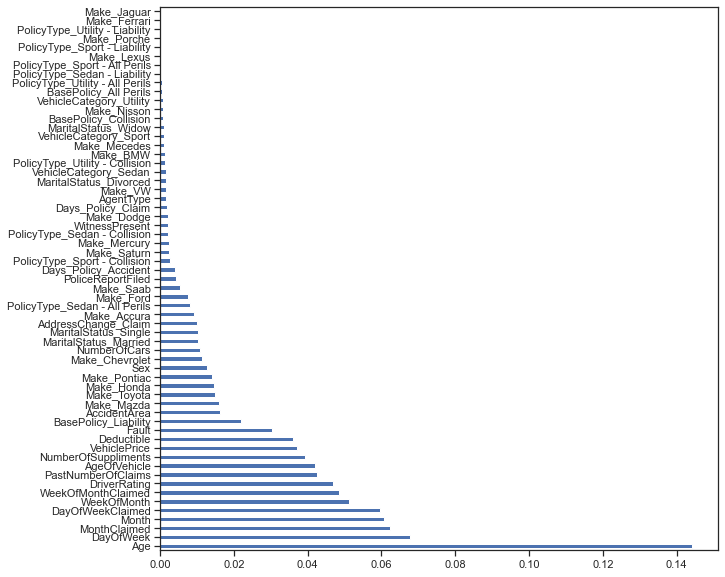

In [48]:
features = pd.Series(forest_reg.feature_importances_, index=X_train.columns)
features.nlargest(65).plot(kind='barh',figsize=(10,10))
plt.show()

## 3.2 RFE

In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model = XGBClassifier()
rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=None, num_parallel_tree=None, predictor=None,
                            random_state=None, ...))

In [50]:
X_train.columns[rfe.support_]

Index(['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'VehiclePrice',
       'NumberOfCars', 'AddressChange_Claim', 'AgeOfVehicle', 'WeekOfMonth',
       'AccidentArea', 'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault',
       'Deductible', 'DriverRating', 'Make_Accura', 'Make_Chevrolet',
       'Make_Honda', 'Make_Mazda', 'Make_Pontiac', 'Make_Saab', 'Make_Toyota',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Utility - Collision', 'BasePolicy_Collision',
       'BasePolicy_Liability'],
      dtype='object')

remove the unnecessary variables

In [51]:
X_train.drop(columns=['Make_Lexus','Make_Ferrari','Make_Porche',"PolicyType_Sport - Liability","PolicyType_Sedan - Liability",'Make_Jaguar','Make_Lexus'])


,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-0.333333,-0.50,-0.538462,-1.0,-1.000000,-0.816293,1.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.272727,-1.000000,-0.25,-0.076923,-0.6,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,-0.666667,0.50,1.000000,-0.2,0.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.454545,0.666667,0.00,-0.230769,-1.0,1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.636364,-0.333333,0.50,-0.384615,-0.6,-0.666667,-0.408147,-1.0,-0.266667,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,-0.636364,0.333333,-0.50,-0.384615,1.0,-1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10789,1.000000,0.000000,0.50,1.000000,-0.6,1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10791,0.272727,0.666667,0.00,0.384615,-1.0,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10792,-0.454545,0.666667,0.25,-0.230769,-0.2,1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [52]:
X_test.drop(columns=['Make_Porche',"PolicyType_Sedan - Liability"])

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-1.000000,-0.666667,-0.818182,-0.2,-1.000000,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.454545,0.333333,-1.000000,0.454545,-0.6,1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.818182,-0.666667,-0.666667,-0.636364,-0.2,-1.000000,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.818182,1.000000,0.333333,1.000000,-0.2,1.000000,-0.408147,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.090909,-0.666667,0.333333,-0.090909,1.0,-1.000000,-0.816293,1.0,1.0,-0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,0.272727,0.333333,-0.666667,0.272727,1.0,1.000000,-0.408147,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2309,1.000000,1.000000,-1.000000,1.000000,-0.2,-0.666667,-0.408147,1.0,1.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2310,0.454545,0.666667,0.000000,0.454545,-0.6,1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2311,0.272727,-0.333333,0.333333,0.454545,-1.0,-1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [53]:
X_val.drop(columns=['Make_Porche',"PolicyType_Sedan - Liability"])

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,0.636364,-1.000000,-0.666667,0.636364,-1.0,0.000000,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.454545,0.333333,0.000000,0.454545,1.0,-0.666667,-0.816293,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.454545,-1.000000,-0.666667,-0.454545,-0.2,-0.666667,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.818182,-0.666667,-1.000000,-0.818182,-0.6,-1.000000,-0.816293,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.636364,0.000000,0.333333,-0.636364,-0.6,1.000000,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,0.818182,-0.666667,-0.333333,0.818182,-0.6,0.000000,1.000000,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2309,0.272727,0.333333,-0.333333,0.272727,-0.2,1.000000,1.000000,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2310,0.454545,1.000000,0.333333,0.454545,-0.2,0.000000,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2311,0.636364,-0.666667,0.000000,0.636364,-1.0,1.000000,-0.816293,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# 4. Modelling

Using the features selected by RFE

In [54]:
col = ['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'VehiclePrice',
       'AddressChange_Claim', 'AgeOfVehicle', 'WeekOfMonth', 'AccidentArea',
       'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'Deductible',
       'DriverRating', 'PoliceReportFiled', 'Make_Mazda', 'Make_Saab',
       'Make_VW', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - All Perils',
       'VehicleCategory_Sedan', 'BasePolicy_Collision',
       'BasePolicy_Liability']

In [55]:
X_train = X_train[col]
X_val = X_val[col]
X_test = X_test[col]

Import Library

In [56]:
import warnings
import gc
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import diverging_palette

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import FeatureImportances

from sklearn import metrics
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import (ROCAUC)
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

In [57]:
#pip install scikit-learn==1.0.2

## 4.1 Baseline Model

Since we are dealing with default problem, the top 1 task is to measure the proportion of actual defaults that are correctly identified as defaults (Recall), followed by Precision.

In [58]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

**Performance of DummyClassifier**

In [59]:
dummy_predict = dummy_clf.predict(X_val)
print("recall:",metrics.recall_score(y_val, dummy_predict))
print("precision:",metrics.precision_score(y_val, dummy_predict))
print("accuracy:",metrics.accuracy_score(y_val, dummy_predict))

recall: 0.0
precision: 0.0
accuracy: 0.9448123620309051


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4.2 Evaluation Metrics

#### ROC Curve

In [60]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### PR Curve

In [61]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [62]:
# Since we need to have the same columns in the train and test datasets, we will eliminate the following columns
# because they don't exist in the test dataset:
#X_train.drop(columns=['Make_Ferrari','Make_Jaguar','Make_Lexus','PolicyType_Sport - Liability'],inplace=True)

## 4.3 Dealing imbalanced data

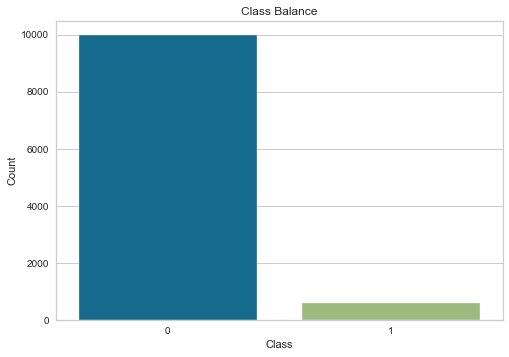

In [63]:
# We will graph the frequency of fraud and non fraud to see if the dataset is imbalanced
sns.countplot(x=y_train)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()

As it is expected, our dataset is very inbalanced since we have a lot of cases in which we don't have fraud and few of fraud cases

**SMOTEENN**

In [64]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteen, y_train_smoteen = smote_enn.fit_resample(X_train, y_train)

In [65]:
y_train.value_counts()

0    9981
1     596
Name: FraudFound_P, dtype: int64

In [66]:
y_train_smoteen.value_counts()

1    9961
0    7197
Name: FraudFound_P, dtype: int64

In [67]:
y_val.value_counts()

0    2140
1     125
Name: FraudFound_P, dtype: int64

## 4.4 Models

### 4.4.1 Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
LogReg = LogisticRegression(C=0.0001, random_state=42, max_iter=500)
model_LogReg = LogReg.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_LogReg = model_LogReg.predict(X_val)

#### I. Scores

In [149]:
# Calculate the accuracy score
accuracy_1 = metrics.accuracy_score(y_val, y_val_pred_LogReg)

# Calculate the Precision/Recall
recall_1 = metrics.recall_score(y_val, y_val_pred_LogReg)
precision_1 = metrics.precision_score(y_val, y_val_pred_LogReg)

# Calculate the F1 score
f1_1 = metrics.f1_score(y_val, y_val_pred_LogReg, average='weighted')


# Print the scores
print('Recall:', recall_1)
print('Precision:', precision_1)
print('Accuracy:', accuracy_1)
print('F1 score:', f1_1)
print()

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_LogReg, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 1.0
Precision: 0.062065541211519366
Accuracy: 0.16600441501103752
F1 score: 0.20481729719126476

        pred:0  pred:1
true:0     251    1889
true:1       0     125


#### II. Class Prediction Error

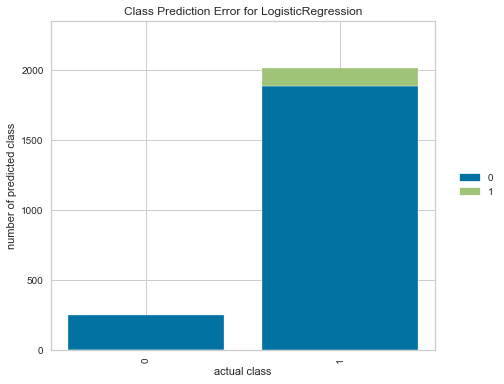

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [150]:
classes = ["0", "1"]

visualizer = ClassPredictionError(
    model_LogReg, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw visualization
visualizer.show()

#### III. Classification Report

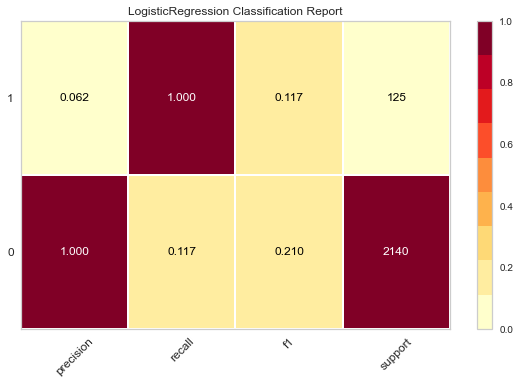

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [151]:
visualizer = ClassificationReport(
    model_LogReg, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train_smoteen, y_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show()  

#### IV. Confusion Matrix

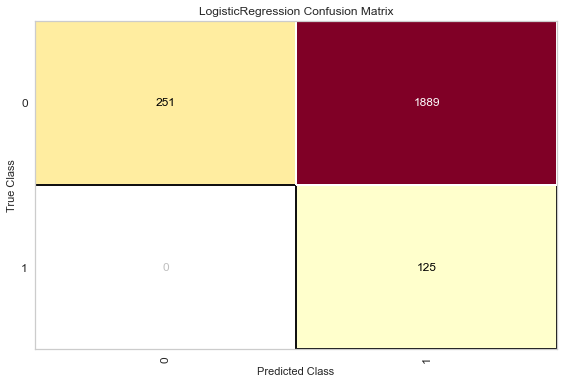

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [152]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_LogReg, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, y_train_smoteen)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

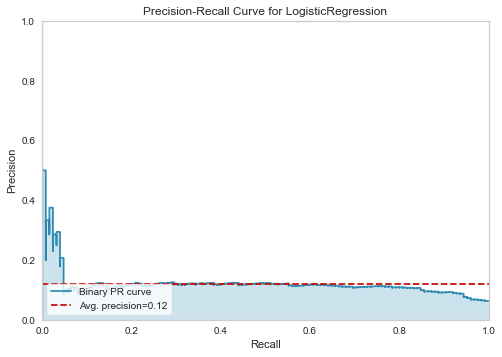

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [153]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_LogReg, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

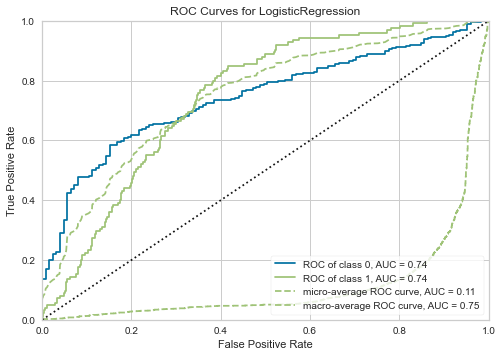

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [154]:
visualizerroc = ROCAUC(model_LogReg, classes=classes, is_fitted=True)

visualizerroc.fit(X_train_smoteen, y_train_smoteen)
visualizerroc.score(X_val, y_val)
visualizerroc.show()

#### VII. Learning Curve (check overfitting)

Using 200 samples

In [160]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

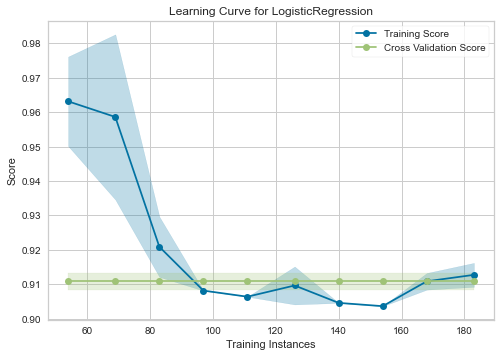

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [161]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_LogReg, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

### 4.4.2 KNN (K-Nearest Neighbors)

In [162]:
from sklearn.neighbors import KNeighborsClassifier

- **Model Tuning**

In [163]:
# K-fold cross validation for different n_neighbors
for i in range (1, 21):
    np.random.seed(42)
    knn = KNeighborsClassifier(n_neighbors=i)
    model_knn = knn.fit(X_train_smoteen, y_train_smoteen)
    y_val_pred_knn = model_knn.predict(X_val)
    scores = accuracy_score(y_val, y_val_pred_knn)
    print(i, ":", scores)

1 : 0.779690949227373
2 : 0.7911699779249448
3 : 0.7161147902869757
4 : 0.7324503311258278
5 : 0.6856512141280353
6 : 0.6971302428256071
7 : 0.6618101545253863
8 : 0.6750551876379691
9 : 0.6392935982339956
10 : 0.6512141280353201
11 : 0.6225165562913907
12 : 0.6335540838852097
13 : 0.6070640176600441
14 : 0.6194260485651214
15 : 0.5947019867549669
16 : 0.6052980132450331
17 : 0.5810154525386313
18 : 0.5938189845474614
19 : 0.5757174392935982
20 : 0.5876379690949227


- **Build Model**

In [164]:
np.random.seed(42)
KNN = KNeighborsClassifier(n_neighbors=2)
model_KNN = KNN.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_KNN = model_KNN.predict(X_val)

- **Learning Curve (check overfitting)**

In [ ]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

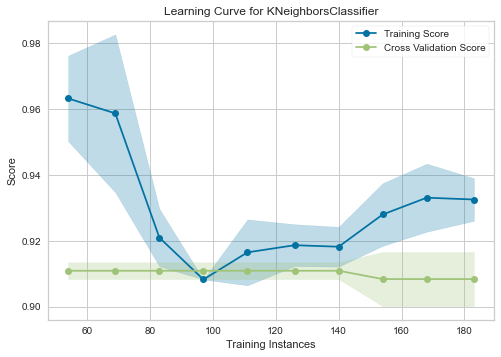

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [172]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_KNN, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### I. Scores

In [165]:
# Calculate the accuracy score
accuracy_2 = metrics.accuracy_score(y_val, y_val_pred_KNN)

# Calculate the Precision/Recall
recall_2 = metrics.recall_score(y_val, y_val_pred_KNN)
precision_2 = metrics.precision_score(y_val, y_val_pred_KNN)

# Calculate the F1 score
f1_2 = metrics.f1_score(y_val, y_val_pred_KNN, average='weighted')


# Print the scores
print('Recall:', recall_2)
print('Precision:', precision_2)
print('Accuracy:', accuracy_2)
print('F1 score:', f1_2)
print()

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_KNN, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.432
Precision: 0.11842105263157894
Accuracy: 0.7911699779249448
F1 score: 0.8419040532304968

        pred:0  pred:1
true:0    1738     402
true:1      71      54


#### II. Class Prediction Error

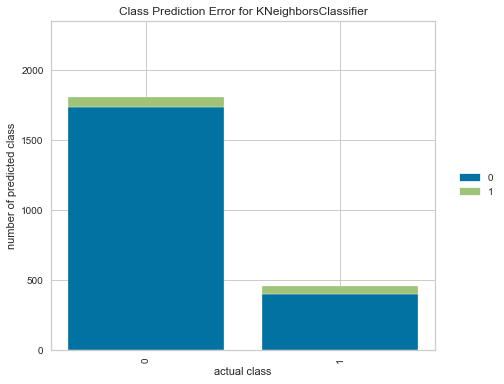

<AxesSubplot:title={'center':'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [166]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_KNN, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_val, y_val)

visualizer.show()

#### III. Classification Report

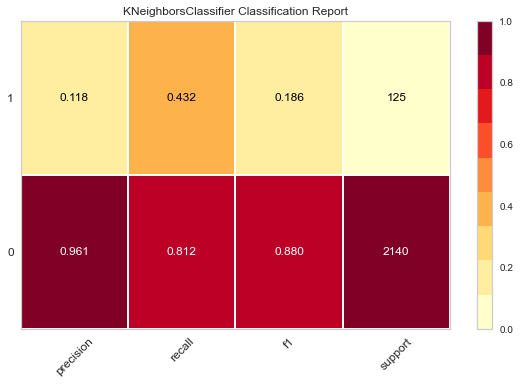

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [167]:
visualizer = ClassificationReport(model_KNN, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show() 

#### IV. Confusion Matrix

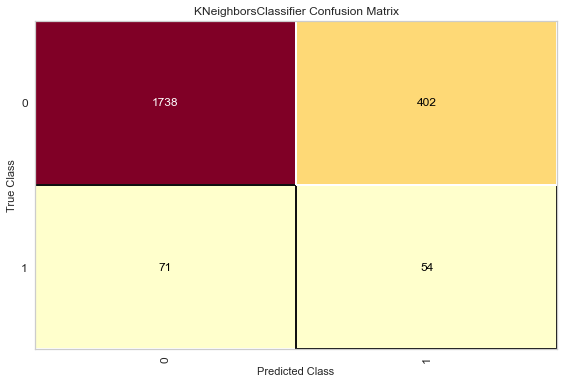

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [168]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_KNN, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

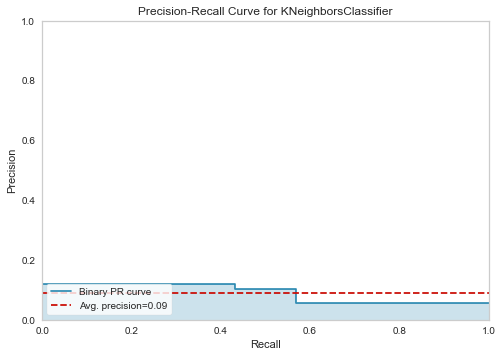

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [169]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_KNN, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

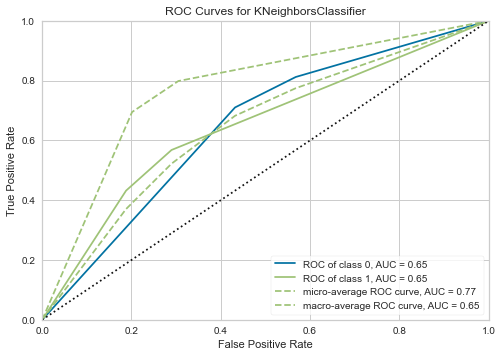

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [170]:
visualizer = ROCAUC(model_KNN, classes=classes, is_fitted=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

### 4.4.3 Random Forest

In [174]:
RF = RandomForestClassifier(random_state=42)
model_RF = RF.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_RF = model_RF.predict(X_val)

#### I. Scores

In [175]:
# Calculate the accuracy score
accuracy_3 = metrics.accuracy_score(y_val, y_val_pred_RF)

# Calculate the Precision/Recall
recall_3 = metrics.recall_score(y_val, y_val_pred_RF)
precision_3 = metrics.precision_score(y_val, y_val_pred_RF)

# Calculate the F1 score
f1_3 = metrics.f1_score(y_val, y_val_pred_RF, average='weighted')


# Print the scores
print('Recall:', recall_3)
print('Precision:', precision_3)
print('Accuracy:', accuracy_3)
print('F1 score:', f1_3)
print()

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_RF, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.288
Precision: 0.18274111675126903
Accuracy: 0.8896247240618101
F1 score: 0.9010205418494677

        pred:0  pred:1
true:0    1979     161
true:1      89      36


#### II. Class Prediction Error

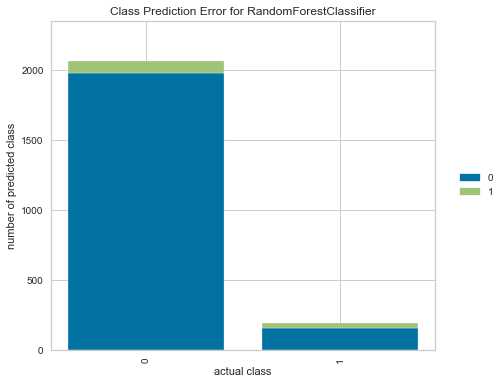

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [92]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_RF, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_val, y_val)

visualizer.show()

#### III. Classification Report

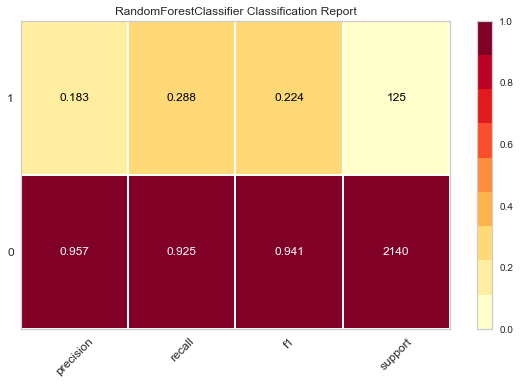

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [93]:
visualizer = ClassificationReport(model_RF, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show() 

#### IV. Confusion Matrix

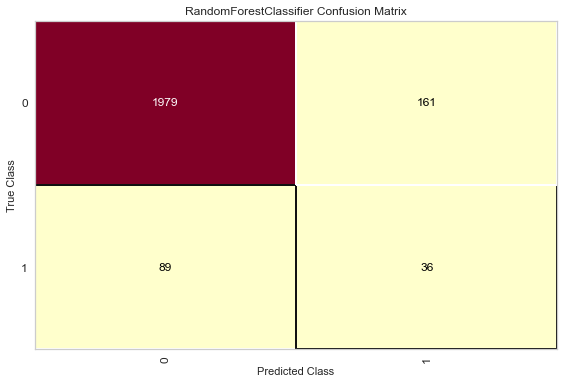

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [94]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_RF, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

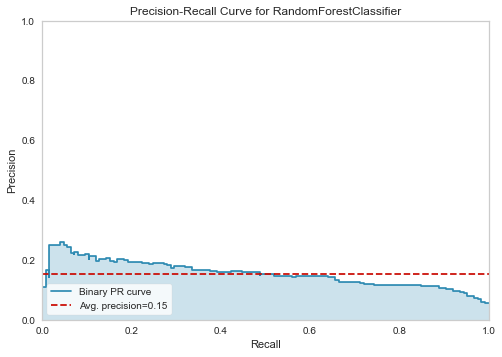

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [95]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_RF, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

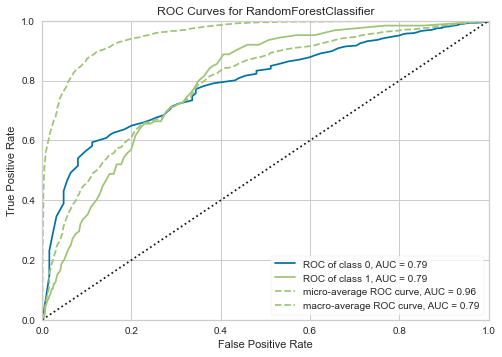

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [96]:
visualizer = ROCAUC(model_RF, classes=classes, is_fitted=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

#### VII. Learning Curve

In [97]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

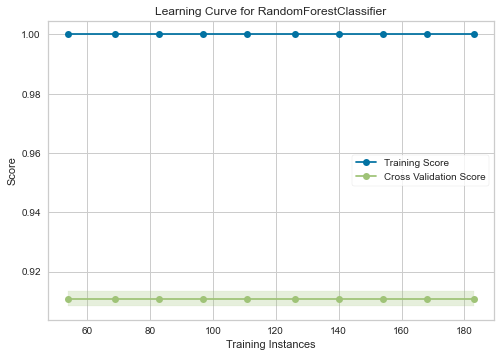

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [98]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_RF, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

<font size="3.5">**Insights**</font><br>Overfitted model!

- **Reduce Overfitting by decrease the number of trees**

In [99]:
RF = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=5)
model_RF = RF.fit(X_train_smoteen, y_train_smoteen)
y_val_pred_RF = model_RF.predict(X_val)

#### I. Scores

In [100]:
# Calculate the accuracy score
accuracy_3 = metrics.accuracy_score(y_val, y_val_pred_RF)

# Calculate the Precision/Recall
recall_3 = metrics.recall_score(y_val, y_val_pred_RF)
precision_3 = metrics.precision_score(y_val, y_val_pred_RF)

# Calculate the F1 score
f1_3 = metrics.f1_score(y_val, y_val_pred_RF, average='weighted')


# Print the scores
print('Recall:', recall_3)
print('Precision:', precision_3)
print('Accuracy:', accuracy_3)
print('F1 score:', f1_3)
print()

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_RF, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.472
Precision: 0.17151162790697674
Accuracy: 0.8450331125827815
F1 weighted score: 0.8770355844951214

        pred:0  pred:1
true:0    1855     285
true:1      66      59


#### VII. Learning Curve

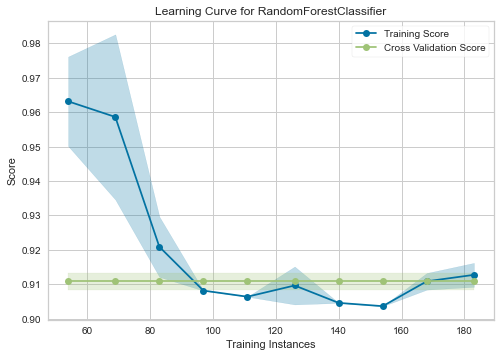

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [101]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_RF, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

### 4.4.4 XGBoost

In [102]:
import xgboost as xgb

In [103]:
XGB = xgb.XGBClassifier()
model_XGB = XFB.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_XGB = model_XGB.predict(X_val)

- **Model Tuning**

In [106]:
XGB = xgb.XGBClassifier()
params = {'n_estimators':range(50,200,50),
          #'min_samples_leaf':[3],
          #'max_features': range(1,10),
          'max_depth':range(3,10),
          'learning_rate':[0.001,0.01,0.1,1,2,3]
         }
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search_XGB = GridSearchCV(estimator=XGB, param_grid=params, scoring='f1_weighted', cv=kfold)
grid_search_XGB.fit(X_train_smoteen, y_train_smoteen)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [107]:
# Print out the tunning result
grid_search_XGB.best_score_

0.9722887128743266

In [108]:
# Print out the tunning parameters
grid_search_XGB.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}

- **Build Model**

In [109]:
XGB = xgb.XGBClassifier(max_depth=9, n_estimators=80, learning_rate=0.1)
model_XGB = XGB.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_XGB = model_XGB.predict(X_val)

#### I. Scores

In [110]:
# Calculate the accuracy score
accuracy_4 = metrics.accuracy_score(y_val, y_val_pred_XGB)

# Calculate the Precision/Recall
recall_4 = metrics.recall_score(y_val, y_val_pred_XGB)
precision_4 = metrics.precision_score(y_val, y_val_pred_XGB)

# Calculate the F1 score
f1_4 = metrics.f1_score(y_val, y_val_pred_XGB, average='weighted')


# Print the scores
print('Recall:', recall_4)
print('Precision:', precision_4)
print('Accuracy:', accuracy_4)
print('F1 score:', f1_4)
print()

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_XGB, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.432
Precision: 0.14173228346456693
Accuracy: 0.8242825607064017
F1_weighted_score: 0.8631434005014578

        pred:0  pred:1
true:0    1813     327
true:1      71      54


#### II. Class Prediction Error

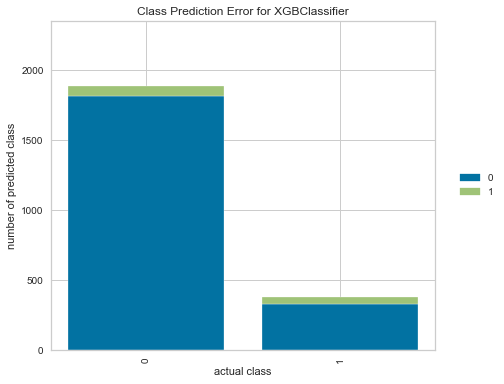

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [111]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_XGB, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw visualization
visualizer.show()

#### III. Classification Report

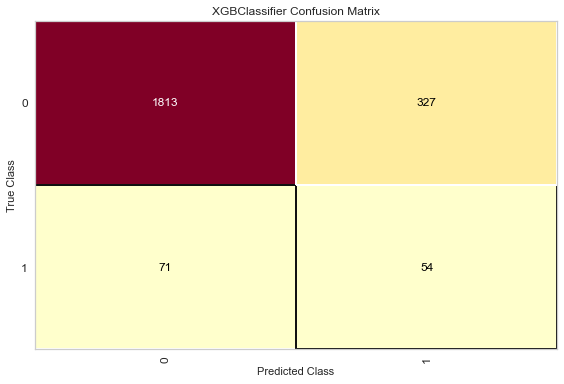

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [112]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_XGB, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

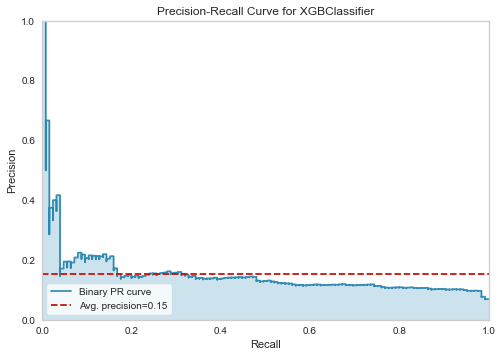

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [113]:
viz = PrecisionRecallCurve(model_XGB, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_test, y_test)
viz.show()

#### VI. ROC-AUC

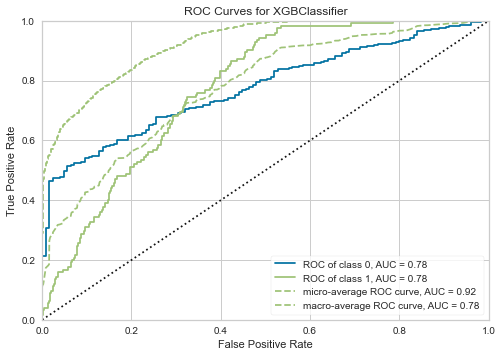

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [114]:
visualizerroc2 = ROCAUC(model_XGB, classes=classes, is_fitted=True)

visualizerroc2.fit(X_train_smoteen, y_train_smoteen)
visualizerroc2.score(X_test, y_test)
visualizerroc2.show()

#### VII. Learning Curve (check overfitting)

In [115]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

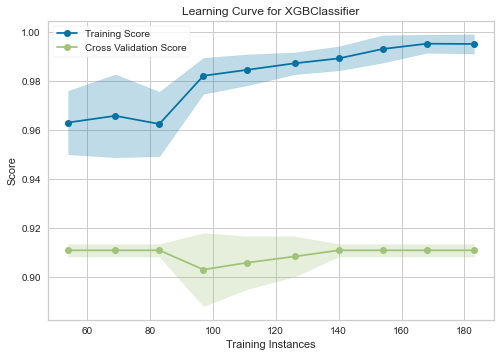

<AxesSubplot:title={'center':'Learning Curve for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [116]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_XGB, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

<font size="3.5">**Insights**</font><br>Overfitted model!

- **Reduce Overfitting**

In [117]:
XGB_final = xgb.XGBClassifier(max_depth=6, n_estimators=150, learning_rate=0.01)
model_XGB_final = XGB_final.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_XGB_final = model_XGB_final.predict(X_val)

#### I. Scores

In [118]:
# Calculate the accuracy score
accuracy_4 = metrics.accuracy_score(y_val, y_val_pred_XGB_final)

# Calculate the Precision/Recall
recall_4 = metrics.recall_score(y_val, y_val_pred_XGB_final)
precision_4 = metrics.precision_score(y_val, y_val_pred_XGB_final)

# Calculate the F1 score
f1_4 = metrics.f1_score(y_val, y_val_pred_XGB_final, average='weighted')


# Print the scores
print('Recall:', recall_4)
print('Precision:', precision_4)
print('Accuracy:', accuracy_4)
print('F1 score:', f1_4)
print()

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_XGB_final, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.768
Precision: 0.11707317073170732
Accuracy: 0.6675496688741722
F1_weighted_score: 0.7575749605509365

        pred:0  pred:1
true:0    1416     724
true:1      29      96


#### VII. Learning Curve

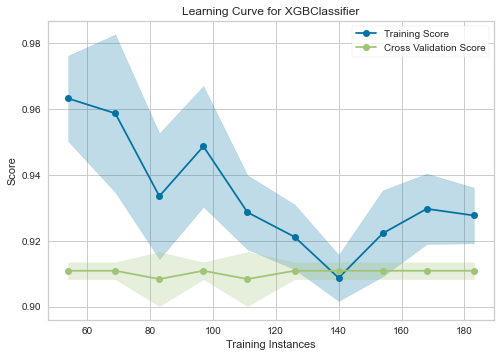

<AxesSubplot:title={'center':'Learning Curve for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [119]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_XGB_final, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### VIII. Feature Importance

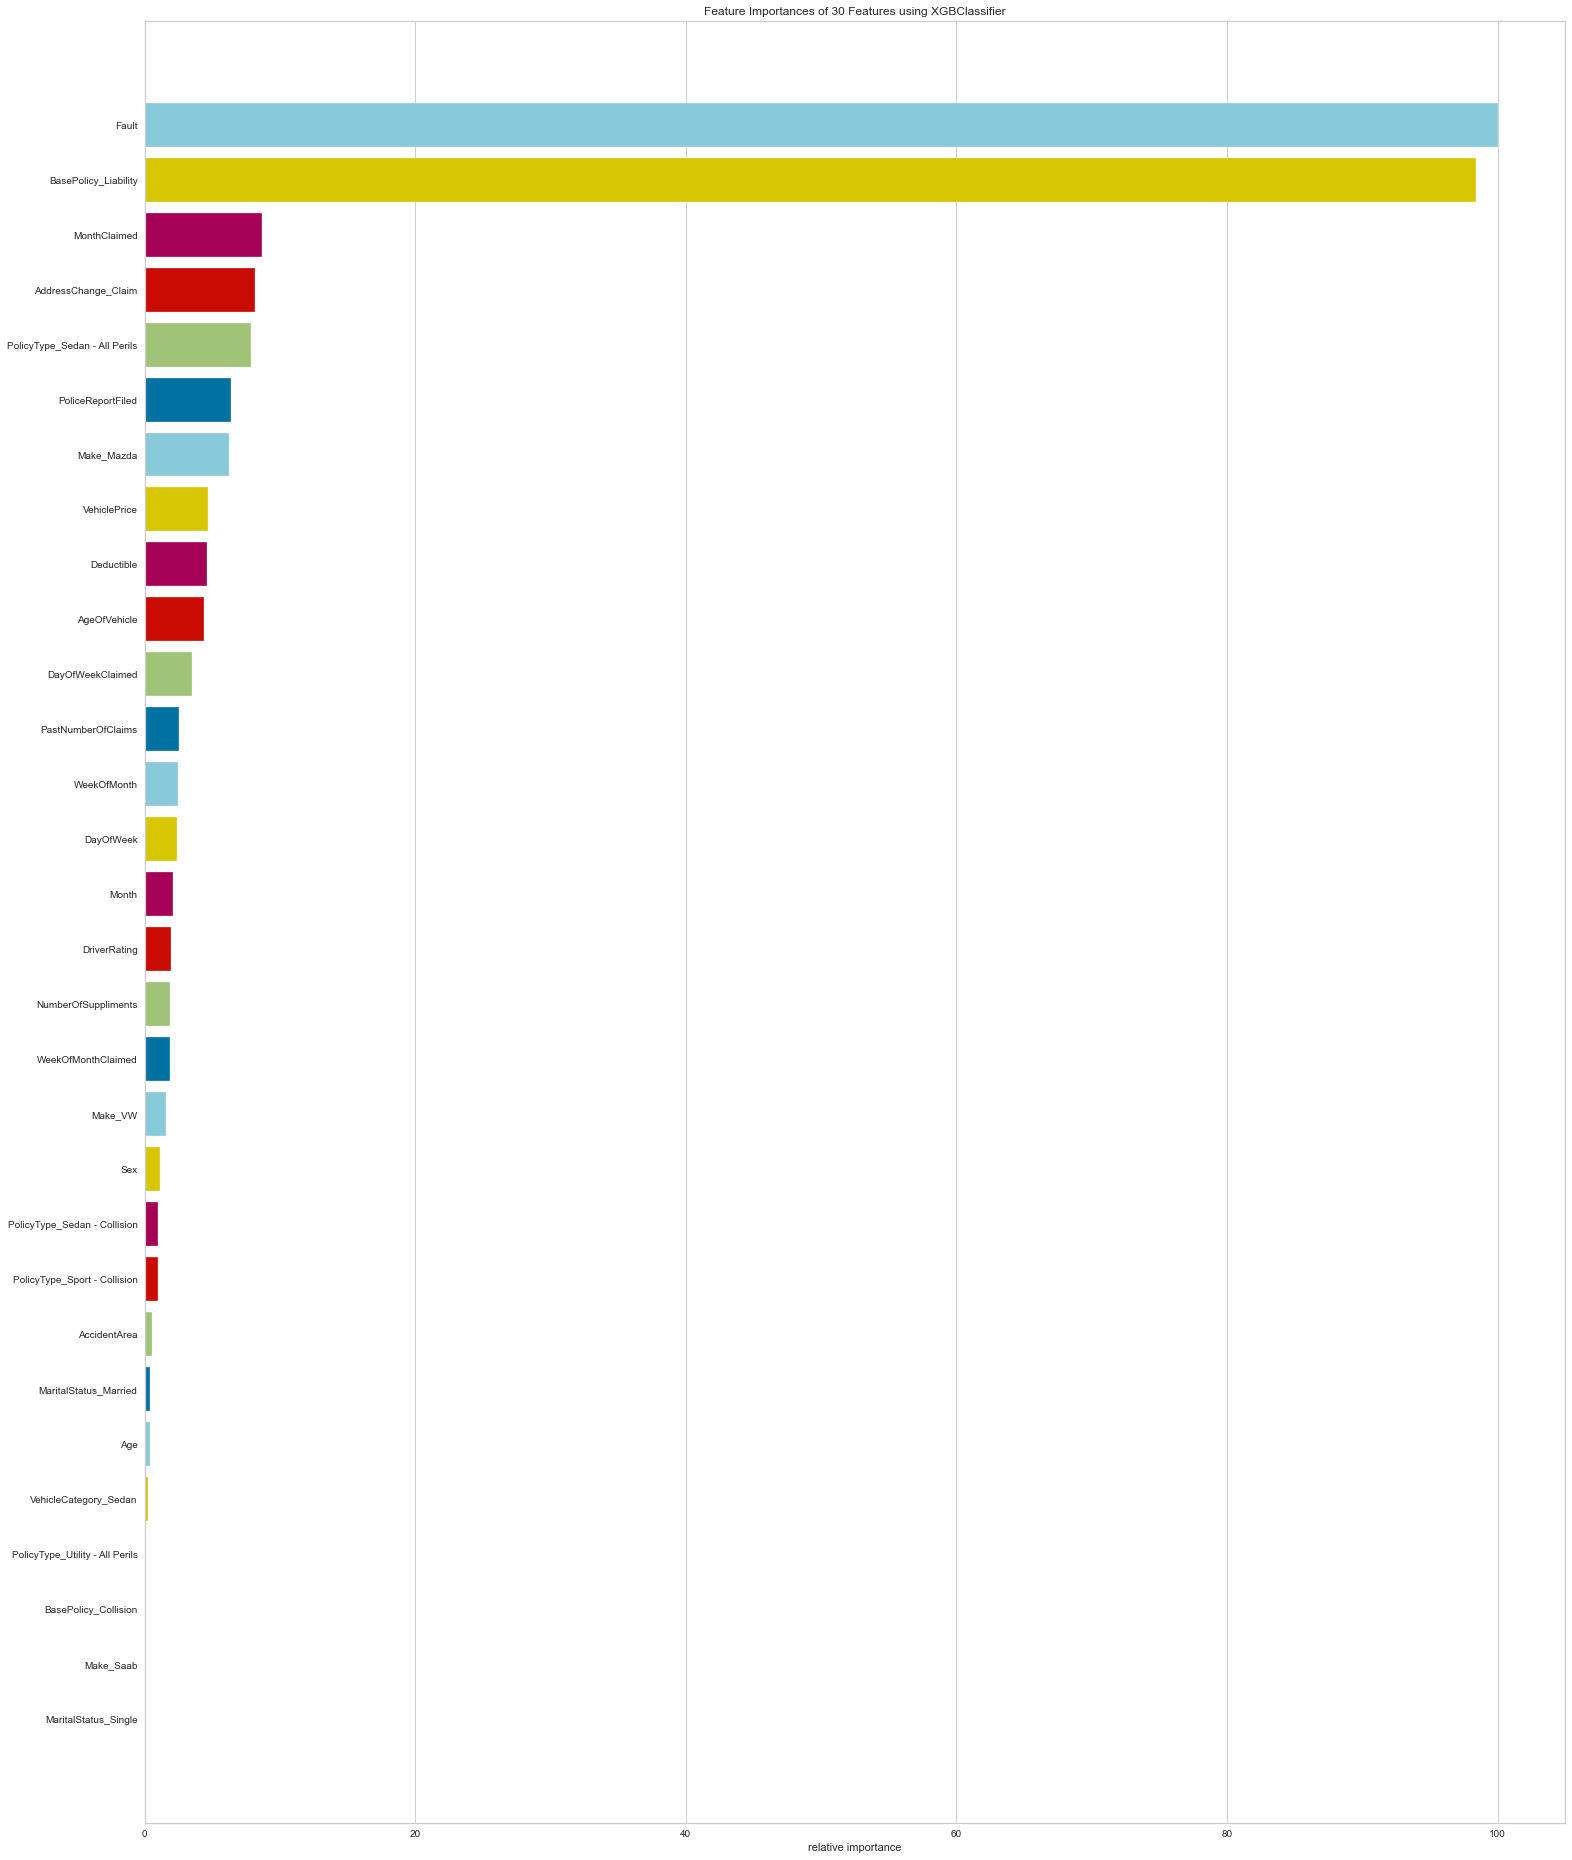

<AxesSubplot:title={'center':'Feature Importances of 30 Features using XGBClassifier'}, xlabel='relative importance'>

In [120]:
fig = plt.figure(figsize=(22, 26))
viz4 = FeatureImportances(model_XGB_final, labels=X_train_smoteen.columns)
viz4.fit(X_train_smoteen, y_train_smoteen)
viz4.poof()

### 4.4.5 ANN (Artificial Neural Network)

In [176]:
from sklearn.neural_network import MLPClassifier

- **Model Tuning**

In [122]:
# Cross-validate with different size of one hidden layer
for i in range (2, 21):    
    ANN1 = MLPClassifier(hidden_layer_sizes=(i), max_iter=1000, random_state=42)
    scores = cross_val_score(estimator=ANN1, X=X_train_smoteen, y=y_train_smoteen, cv=5)
    print(i, ":", np.average(scores))

2 : 0.8669432311592032
3 : 0.8688657475818655
4 : 0.8814546038824675
5 : 0.8844271923549101
6 : 0.888623506096546
7 : 0.8794737614469472
8 : 0.8963172744869043
9 : 0.9098963142172118
10 : 0.910712572669728
11 : 0.9108291907257223
12 : 0.910304460428331
13 : 0.9149089033962248
14 : 0.9185803000069978
15 : 0.917647644301681
16 : 0.9112366235726773
17 : 0.9183472167587585
18 : 0.9256907742990517
19 : 0.934782991224262
20 : 0.9356570831286657


In [123]:
# Cross-validate with different size of two hidden layers
for i in range (2, 21):    
    ANN2 = MLPClassifier(hidden_layer_sizes=(i,i), max_iter=1000, random_state=42)
    scores = cross_val_score(estimator=ANN2, X=X_train_smoteen, y=y_train_smoteen, cv=5)
    print(i, ":", np.average(scores))

2 : 0.8700315205051433
3 : 0.8609398301106259
4 : 0.8820959522358531
5 : 0.8903719446782695
6 : 0.88751627998932
7 : 0.8969580453550142
8 : 0.9018534050230349
9 : 0.9204454925236039
10 : 0.9168904082413263
11 : 0.9290711013459484
12 : 0.9296543444896695
13 : 0.9335006002449896
14 : 0.9333260638128025
15 : 0.9319855506390045
16 : 0.9406692646710134
17 : 0.9400285107877646
18 : 0.9459729573836249
19 : 0.942300949317854
20 : 0.9442247905596783


- **Build Model**

In [124]:
ANN = MLPClassifier(hidden_layer_sizes=(18,18), max_iter=1000, random_state=42)
model_ANN = ANN.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_ANN = model_ANN.predict(X_val)

- **Learning Curve (check overfitting)**

In [131]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

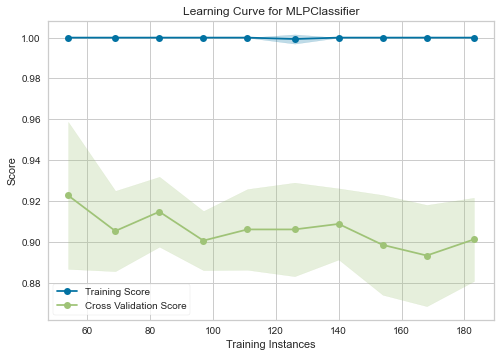

<AxesSubplot:title={'center':'Learning Curve for MLPClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [132]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_ANN, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### I. Scores

In [125]:
# Calculate the accuracy score
accuracy_5 = metrics.accuracy_score(y_val, y_val_pred_ANN)

# Calculate the Precision/Recall
recall_5 = metrics.recall_score(y_val, y_val_pred_ANN)
precision_5 = metrics.precision_score(y_val, y_val_pred_ANN)

# Calculate the F1 score
f1_5 = metrics.f1_score(y_val, y_val_pred_ANN, average='weighted')


# Print the scores
print('Recall:', recall_5)
print('Precision:', precision_5)
print('Accuracy:', accuracy_5)
print('F1 score:', f1_5)
print()

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_ANN, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.472
Precision: 0.1334841628959276
Accuracy: 0.801766004415011
F1 weighted score: 0.8492522628289509

        pred:0  pred:1
true:0    1757     383
true:1      66      59


#### II. Class Prediction Error

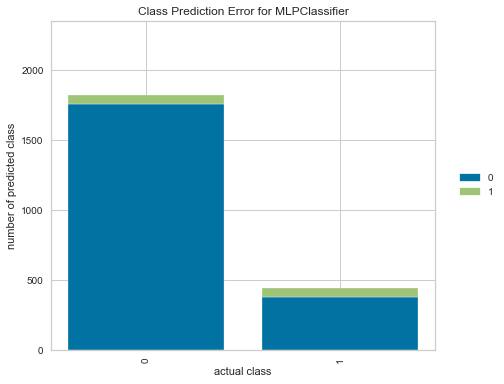

<AxesSubplot:title={'center':'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [126]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_ANN, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_val, y_val)

visualizer.show()

#### III. Classification Report

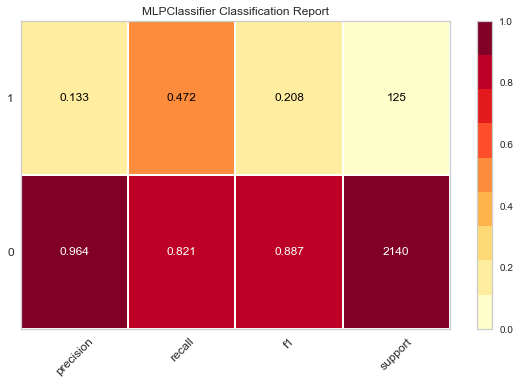

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [127]:
visualizer = ClassificationReport(model_ANN, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show() 

#### IV. Confusion Matrix

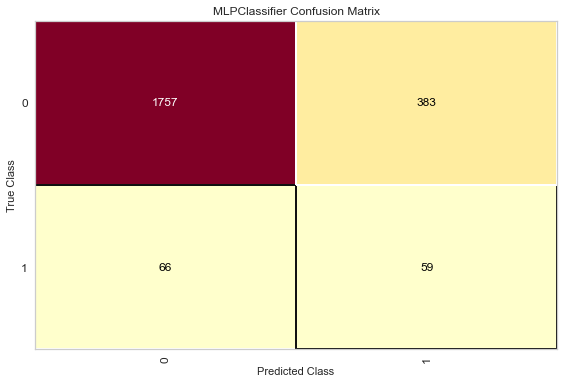

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [128]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_ANN, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

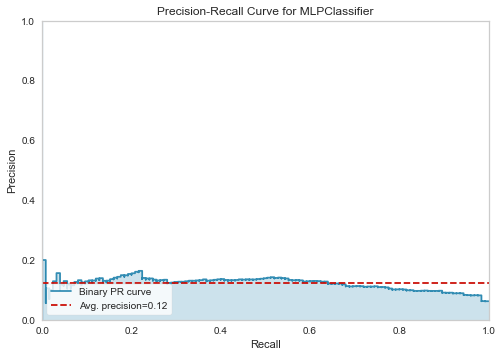

<AxesSubplot:title={'center':'Precision-Recall Curve for MLPClassifier'}, xlabel='Recall', ylabel='Precision'>

In [129]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_ANN, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

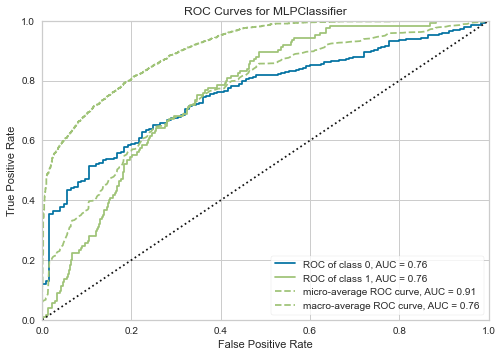

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [130]:
visualizer = ROCAUC(model_ANN, classes=classes, is_fitted=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

### 4.4.6 SVM (Support Vector Machine)

In [68]:
from sklearn.svm import SVC

- **Model Tuning**

In [ ]:
# Build the SVM model using a linear kernel
C_list = [0.1, 1, 10]

for i in C_list:
    SVM_L = SVC(kernel="linear", random_state=42, C=i)
    model_SVM_L = SVM_L.fit(X_train_smoteen, y_train_smoteen)
    y_val_pred_SVM_L = model_SVM_L.predict(X_val)
    scores = accuracy_score(y_val, y_val_pred_SVM_L)
    print(i, ":", scores)

0.1 : 0.6233995584988963
1 : 0.6233995584988963
10 : 0.6233995584988963


In [ ]:
# Build the SVM with a RBF kernel (radial base function)
gamma_list = [0.1, 1, "auto"]
C_list = [0.1, 1]

for i in gamma_list:
    for j in C_list:
        SVM_RBF = SVC(kernel="rbf", random_state=42, gamma=i, C=j)
        model_SVM_RBF = SVM_RBF.fit(X_train_smoteen, y_train_smoteen)
        y_val_pred_SVM_RBF = model_SVM_RBF.predict(X_val)
        scores = accuracy_score(y_val, y_val_pred_SVM_RBF)
        print("gamma", i, "C", j, ":", accuracy_SVM_RBF)

- **Build Model**

- **Learning Curve (check overfitting)**

In [ ]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

In [ ]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_SVM, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### I. Scores

In [ ]:
# Calculate the accuracy score
accuracy_6 = metrics.accuracy_score(y_val, y_val_pred_SVM)

# Calculate the Precision/Recall
recall_6 = metrics.recall_score(y_val, y_val_pred_SVM)
precision_6 = metrics.precision_score(y_val, y_val_pred_SVM)

# Calculate the F1 score
f1_6 = metrics.f1_score(y_val, y_val_pred_SVM, average='weighted')


# Print the scores
print('Recall:', recall_6)
print('Precision:', precision_6)
print('Accuracy:', accuracy_6)
print('F1 score:', f1_6)
print()

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_SVM, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

#### II. Class Prediction Error

In [ ]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_SVM, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_val, y_val)

visualizer.show()

#### III. Classification Report

In [ ]:
visualizer = ClassificationReport(model_SVM, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show() 

#### IV. Confusion Matrix

In [ ]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_SVM, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

In [ ]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_SVM, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

In [ ]:
visualizer = ROCAUC(model_SVM, classes=classes, is_fitted=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

### 4.4.x LightGBM Model (Pending dont use in the PPT)

In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, plot_precision_recall_curve, roc_curve, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

In [617]:
LGBM_m = lgb.LGBMClassifier()
LGBM_m.fit(X_train_smoteen, y_train_smoteen)

LGBMClassifier()

In [618]:
y_pred_gbm_final = LGBM_m.predict(X_val)

In [619]:
# Calculate the metrics
accuracy_final=metrics.accuracy_score(y_val,y_pred_gbm_final)
precision_final=metrics.precision_score(y_val,y_pred_gbm_final)
recall_final=metrics.recall_score(y_val,y_pred_gbm_final)
f1_final=metrics.f1_score(y_val,y_pred_gbm_final,average="weighted")

print('Recall:',recall_final)
print('Precision:',precision_final)
print('Accuracy:',accuracy_final)
print('F1 weighted score:',f1_final)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_pred_gbm_final)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_gbm_final, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.408
Precision: 0.16666666666666666
Accuracy: 0.8547461368653422
F1 weighted score: 0.8820390824499436
        pred:0  pred:1
true:0    1885     255
true:1      74      51


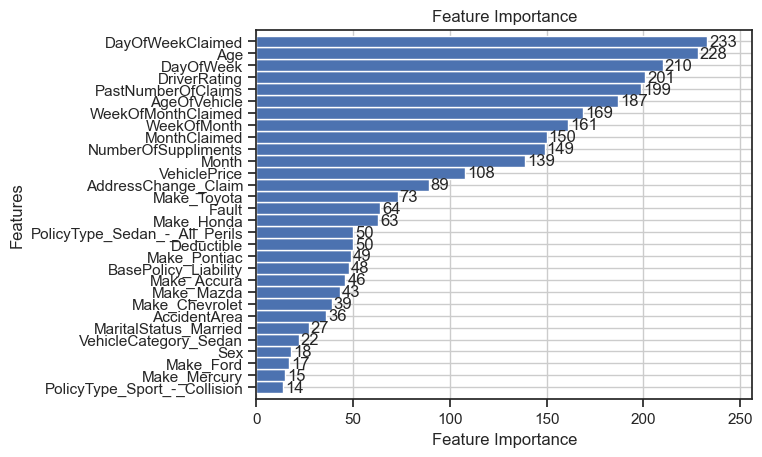

In [ ]:
# Visualizing features relevance
lgb.plot_importance(LGBM_m, height=1, max_num_features=30, xlabel='Feature Importance', ylabel='Features', title='Feature Importance')
plt.show()

In [ ]:
# I tried to see if with fewer variables the recall improve but this doesn't happen
#X_train_smoteen_sel = X_train_smoteen[['DayOfWeekClaimed','Age','DayOfWeek','DriverRating','PastNumberOfClaims','AgeOfVehicle','WeekOfMonthClaimed','WeekOfMonth','MonthClaimed','NumberOfSuppliments','Month','VehiclePrice']]
#X_test_sel = X_test[['DayOfWeekClaimed','Age','DayOfWeek','DriverRating','PastNumberOfClaims','AgeOfVehicle','WeekOfMonthClaimed','WeekOfMonth','MonthClaimed','NumberOfSuppliments','Month','VehiclePrice']]


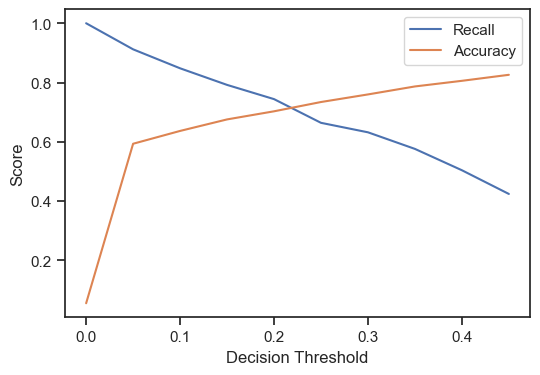

In [ ]:
# Defining the appropiate probability threshold:
y_score = LGBM_m.predict_proba(X_val)[:, 1]

# Define a range of decision thresholds to loop through
thresholds = np.arange(0, 0.5, 0.05)

# Initialize arrays to store precision and recall at each threshold
accuracies = []
recalls = []

# Loop through the thresholds
for threshold in thresholds:
    y_pred = (y_score > threshold).astype(int)  # binary predictions based on threshold
    recall = recall_score(y_val, y_pred)  # calculate recall
    accuracy = accuracy_score(y_val, y_pred)  # calculate accuracy
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot the results
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(thresholds, recalls, label='Recall')
ax.plot(thresholds, accuracies, label='Accuracy')
ax.set_xlabel('Decision Threshold')
ax.set_ylabel('Score')
ax.legend()
plt.show()

We decided to use a probability thresold of 0.1 because we are more interested to have a better recall and identify the cases where a fraud will occur.

In [ ]:
# Make predictions on Validation set
y_pred = LGBM_m.predict_proba(X_val)[:,1]

In [ ]:
# Convert predictions to binary (0 or 1) based on threshold of 0.1
y_pred_binary = np.where(y_pred > 0.1, 1, 0)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_binary)
roc_auc = roc_auc_score(y_val, y_pred)
print(f"Accuracy: {accuracy}, ROC AUC: {roc_auc}")

Accuracy: 0.636644591611479, ROC AUC: 0.7986130841121496


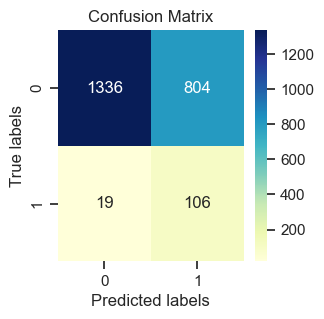

In [ ]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
cm_LGBM = confusion_matrix(y_val, y_pred_binary)

# Plot the confusion matrix with labels
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_LGBM, annot=True, fmt="d", cmap="YlGnBu", ax=ax)
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
plt.show()

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score
acc = accuracy_score(y_val, y_pred_binary)
prec = precision_score(y_val, y_pred_binary)
rec = recall_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary)

# Print the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.636644591611479
Precision: 0.11648351648351649
Recall: 0.848
F1 Score: 0.20483091787439614


Model Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
model_LGBM = lgb.LGBMClassifier()

param_grid = {
    'n_estimators':range(50,200,50),
    'learning_rate': [0.001,0.01,0.1,1,1.5,2],
    'max_depth': range(3,21,3),
    'num_leaves': range(5,50,5),
    'reg_alpha': [0, 0.1, 0.5,1],
    'reg_lambda': [0, 0.1, 0.5]
}

grid_search = GridSearchCV(estimator=model_LGBM,param_grid=param_grid,scoring='recall',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best recall: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 2, 'max_depth': 15, 'n_estimators': 50, 'num_leaves': 30, 'reg_alpha': 0, 'reg_lambda': 0}
Best recall:  0.5154341736694678


Model after tunning

In [ ]:
LGBM_m = lgb.LGBMClassifier(n_estimators=50,max_depth=15,learning_rate=2,num_leaves=30,reg_alpha=0,reg_lambda=0)
LGBM_m.fit(X_train_smoteen, y_train_smoteen)

y_pred = LGBM_m.predict_proba(X_val)[:,1]
y_pred_binary = np.where(y_pred > 0.1, 1, 0)

# Calculate the accuracy, precision, recall, and F1 score
acc = accuracy_score(y_val, y_pred_binary)
prec = precision_score(y_val, y_pred_binary)
rec = recall_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary)

# Print the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.2379690949227373
Precision: 0.0570005534034311
Recall: 0.824
F1 Score: 0.10662525879917184


In [ ]:
# Doing Cross Validation to see if there is overfitting:

from sklearn.model_selection import KFold

# Define the K-Fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the lists to store the evaluation metrics
acc_scores = []
rec_scores = []

# Iterate over K-Fold splits
for i, (train_idx, val_idx) in enumerate(kfold.split(X_train_smoteen, y_train_smoteen)):
    # Split data into training and validation sets
    X_train, y_train = X_train_smoteen.iloc[train_idx], y_train_smoteen.iloc[train_idx]
    X_val, y_val = X_train_smoteen.iloc[val_idx], y_train_smoteen.iloc[val_idx]
    
    # Create LightGBM dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    
    # Train the LightGBM model
    LGBM_m = lgb.LGBMClassifier()
    LGBM_m.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = LGBM_m.predict(X_val)
    
    # Calculate and store the evaluation metrics
    acc_score = accuracy_score(y_val, y_pred)
    rec_score = recall_score(y_val, y_pred)
    acc_scores.append(acc_score)
    rec_scores.append(rec_score)
    
    print(f"Fold {i+1} Accuracy: {acc_score:.4f} | Recall: {rec_score:.4f}")

# Print the average evaluation metrics
print(f"\nAverage Accuracy: {np.mean(acc_scores):.4f} | Average Recall: {np.mean(rec_scores):.4f}")

We can conclude that we don't have overfitting since the accuracy and recall remain constant among different K-folds

#### Check overfitting using learning curve
(this is what prof taught in class i remember)

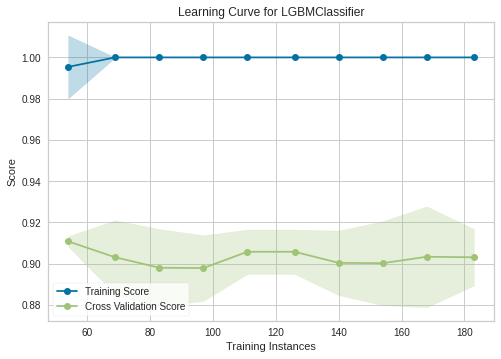

In [620]:
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    LGBM_m, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

### 4.4.x CatBoost Model (Pending dont use in PPT)

In [284]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.6 MB/s eta 0:00:00


In [ ]:
# Selecting the appropiate probability threshold:

# Create a CatBoost model and fit it to the training data
cat_model = cb.CatBoostClassifier()
cat_model.fit(X_train_smoteen, y_train_smoteen)

# Make probability predictions on the test data
y_score = cat_model.predict_proba(X_val)[:, 1]

# Define a range of decision thresholds to loop through
thresholds = np.arange(0, 0.5, 0.05)

# Initialize arrays to store precision and recall at each threshold
accuracies = []
recalls = []

# Loop through the thresholds
for threshold in thresholds:
    y_pred = (y_score > threshold).astype(int)  # binary predictions based on threshold
    recall = recall_score(y_test, y_val)  # calculate recall
    accuracy = accuracy_score(y_test, y_vall)  # calculate accuracy
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot the results
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(thresholds, recalls, label='Recall')
ax.plot(thresholds, accuracies, label='Accuracy')
ax.set_xlabel('Decision Threshold')
ax.set_ylabel('Score')
ax.legend()
plt.show()

In [487]:
cat_model = cb.CatBoostClassifier()
cat_model.fit(X_train_smoteen, y_train_smoteen)
y_pred_cat = cat_model.predict(X_val)

Learning rate set to 0.033701
0:	learn: 0.6590286	total: 18.7ms	remaining: 18.6s
1:	learn: 0.6269742	total: 26.2ms	remaining: 13.1s
2:	learn: 0.6022364	total: 33.6ms	remaining: 11.2s
3:	learn: 0.5781088	total: 41.4ms	remaining: 10.3s
4:	learn: 0.5580488	total: 49ms	remaining: 9.76s
5:	learn: 0.5398014	total: 56.6ms	remaining: 9.38s
6:	learn: 0.5218934	total: 63.9ms	remaining: 9.06s
7:	learn: 0.5068917	total: 72.8ms	remaining: 9.03s
8:	learn: 0.4923419	total: 80.7ms	remaining: 8.89s
9:	learn: 0.4799848	total: 89.2ms	remaining: 8.83s
10:	learn: 0.4696136	total: 96.6ms	remaining: 8.68s
11:	learn: 0.4602727	total: 104ms	remaining: 8.55s
12:	learn: 0.4515639	total: 119ms	remaining: 9.03s
13:	learn: 0.4446467	total: 126ms	remaining: 8.91s
14:	learn: 0.4374994	total: 134ms	remaining: 8.8s
15:	learn: 0.4310799	total: 142ms	remaining: 8.72s
16:	learn: 0.4246294	total: 150ms	remaining: 8.65s
17:	learn: 0.4199730	total: 158ms	remaining: 8.6s
18:	learn: 0.4143789	total: 165ms	remaining: 8.52s
19:	

In [491]:
# Calculate the accuracy, precision, recall, and F1 score
acc = accuracy_score(y_val, y_pred_cat)
prec = precision_score(y_val, y_pred_cat)
rec = recall_score(y_val, y_pred_cat)
f1 = f1_score(y_val, y_pred_cat,average="weighted")

# Print the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 weighted Score:", f1)

Accuracy: 0.6719646799116997
Precision: 0.12039312039312039
Recall: 0.784
F1 weighted Score: 0.7608443340604287


Similarly to the outputs of the LightGBM, we decided to select 0.1 for the probability threshold to improve the recall and have a decent level of accuracy

In [ ]:
# Running the Catboost with 0.1 probability threshold:
Catb_m = cb.CatBoostClassifier(random_seed=42)

# Train model
Catb_m.fit(X_train_smoteen, y_train_smoteen)

# Get predicted probabilities
y_proba = Catb_m.predict_proba(X_test)[:, 1]

# Convert predictions to binary (0 or 1) based on threshold of 0.1
y_pred_binary = np.where(y_pred > 0.1, 1, 0)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

In [ ]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
cm_CatB = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix with labels
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_CatB, annot=True, fmt="d", cmap="YlGnBu", ax=ax)
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
plt.show()

In [489]:
# Calculate the accuracy, precision, recall, and F1 score
acc = accuracy_score(y_test, y_pred_binary)
prec = precision_score(y_test, y_pred_binary)
rec = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

NameError: ignored

We can note that all the parameters are better than the Light GBM model. We can conclude that the CatBoost is a better model